In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_200_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
# maize
defaults.maize_data['handysize_perc'] = 0
defaults.maize_data['handymax_perc'] = 100
defaults.maize_data['panamax_perc'] = 0
defaults.maize_data['handling_fee'] = 9.8 # example Wijnand
defaults.maize_data['historic_data'] = []
maize = objects.Commodity(**defaults.maize_data)
maize.scenario_data = pd.DataFrame(data=scenario_data)

# wheat
defaults.wheat_data['historic_data'] = []
defaults.wheat_data['scenario_data'] = []
wheat = objects.Commodity(**defaults.wheat_data)

# soybeans
defaults.soybean_data['historic_data'] = []
defaults.soybean_data['scenario_data'] = []
soybeans = objects.Commodity(**defaults.soybean_data)

# combine
demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
defaults.handymax_data['call_size'] = 55000
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)


vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [5]:
Terminal = system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, 
                         storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 14
     Handysize calls: 0
     Handymax calls: 14
     Panamax calls: 0
  Total cargo volume: 750000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy planned (after adding

## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data': [], 'scenario_data':    year   volume
0  2018   750000
1  2019   750000
2  2020   750000
3  2021   750000
4  2022   750000
5  2023  1200000
6  2024  1200000
7  2025  1200000
8  2026  1200000
9  2027  1200000, 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 100, 'panamax_perc': 0, 'name': 'Maize', 'id': '8b591b1e-520a-11e9-b79b-60f677ba2ce0'}

Wheat

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Wheat', 'id': '8b594238-520a-11e9-a2a4-60f677ba2ce0'}

Soybeans

{'historic_data': [], 'scenario_data': [], 'handling_fee': 9.8, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Soybeans', 'id': '8b596948-520a-11e9-9529-60f677ba2ce0'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '8b5f0e9a-520a-11

9  2027       0.0      51000.0     5100.0  26396.8, 'quay': <terminal_optimization.objects.Conveyor_Quay object at 0x000002CAAEB4EBA8>}

Quay_conveyor_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 51000.0, 'energy': 26396.800000000003, 'insurance': 5100.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 510000, 'type': 'quay_conveyor', 'length': 200, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 10, 'unit_rate_factor': 6, 'mobilisation': 30000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'consumption_constant': 81, 'consumption_coefficient': 0.08, 'crew': 1, 'utilisation': 0.8, 'capacity_steps': 400, 'year_purchase': [], 'year_online': 2020, 'name': 'Quay_conveyor_01', 'id': '8b75570c-520a-11e9-a448-60f677ba2ce0', 'df':    year     capex  maintenance  insurance   energy
0  2018       0.0          0.0        0.0      0.0
1  2019  510000.0          0.0        0.0      0.0
2  2020       0.0      51000.0     5100.0  26396.8
3  2021       0

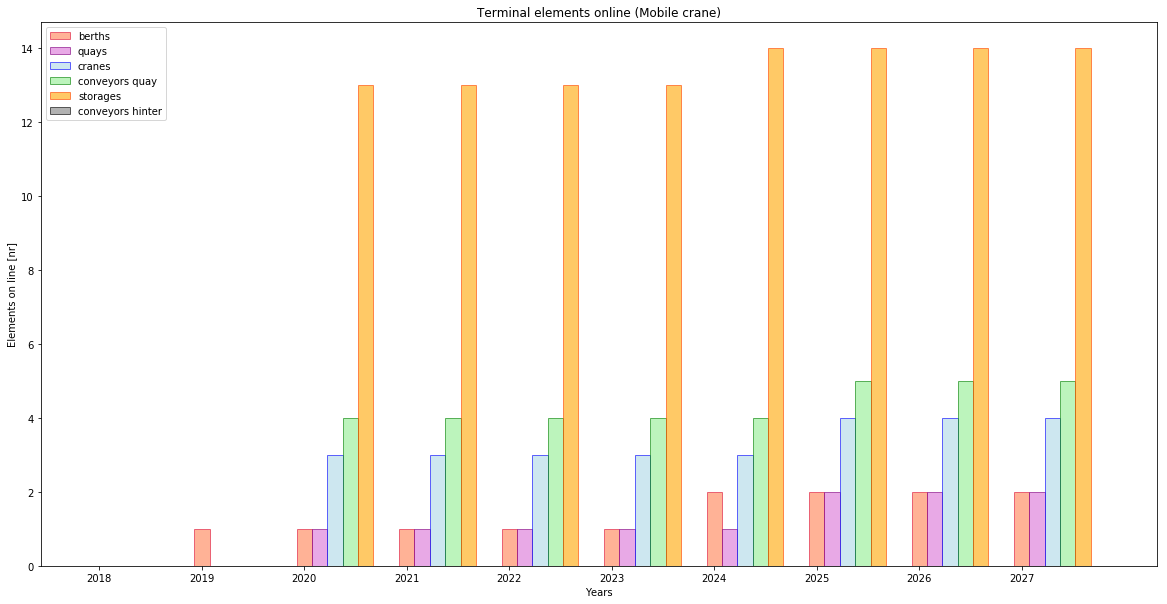

In [8]:
Terminal.terminal_elements_plot()

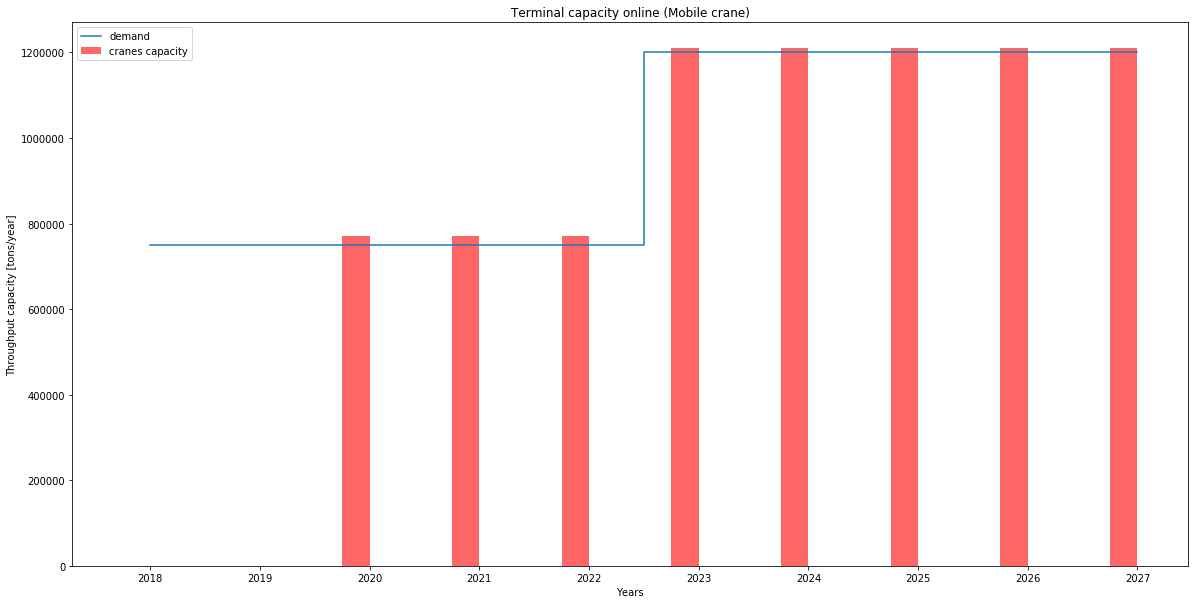

In [9]:
Terminal.terminal_capacity_plot()

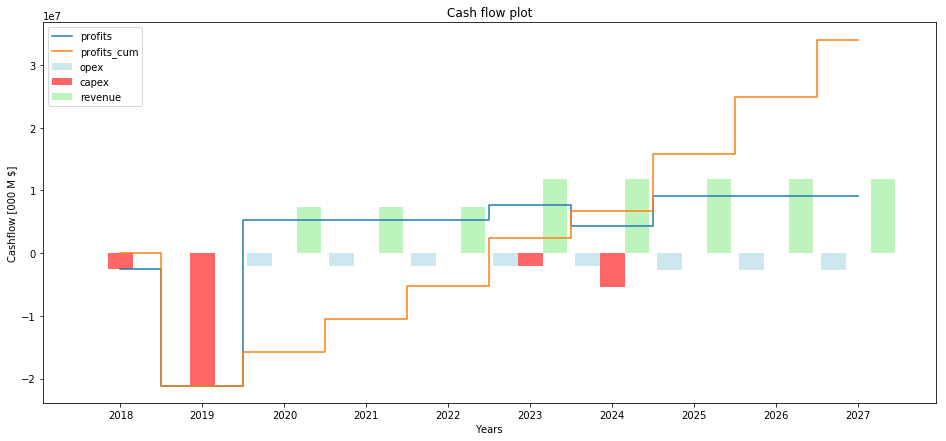

In [10]:
Terminal.cashflow_plot()

## SandBox

In [11]:
Terminal.NPV()

PV: [ -2602528.         -21109602.           5308230.31538462
   5308230.31538462   5308230.31538462   7621854.11538462
   4299681.51538462   9101875.82509113   9101875.82509113
   9101875.82509113]
NPV: 31439724.052196484
